In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:uTkPfyNRAM6n5+wAvlGHxVJUl4zxJ1e1GF4UYGzFmDU root@5e6827529ecf
The key's randomart image is:
+---[RSA 4096]----+
|        .oo.+BXE=|
|       o o. +B*.+|
|        + +..oo.o|
|         B  .  + |
|      . S o.     |
|     . o B.      |
|      o * o.     |
|       o B. o    |
|      .   +o .   |
+----[SHA256]-----+


In [ ]:
import yfinance as yf
df = yf.download(tickers=['TATAMOTORS.NS','INFY.NS','RELIANCE.NS'],period='7d',interval='1m')

[*********************100%***********************]  3 of 3 completed


In [ ]:
len(df)

2616

In [ ]:
# import pandas as pd
df.index = df.index.tz_localize(None)

In [ ]:
df.to_excel('Stock_Data_2.xlsx')

In [ ]:
!mv /content/Stock_Data_2.xlsx /content/drive/MyDrive/Stock_Data_2.xlsx

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-d3c6b5ba


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDVr25IXed9/jlxu5qAC2XpxpXxXnUn3MWkY9FpQUbJGQR0kY+bA45bCF6v5Bds18m2gOLYI2G+nxgw4bsU9W+gEgboAgGGgh+RHKDSG+vOvWK0tsuBGQezuNQUuoSV9yM4Ds6pIlBKKXNsFwr5g3PoNYA79VaJJQnIuXbDSvO2dnXMDx/dsNHLH/bM7m1a04u95ToHAjW5d2f96rwhtj4K58GoBRjvRjm8tubHBdArwHoLAw2u3hzx256ENGvfy3Em/H93Ve1u5bdFsifp7RAiSOELS0oVDsQyUhkHufpdQSLxIt7dm/xq3RhMU2hGaRLDVjsI4a6xuaSP5lclz52otlFBq3DRxkfgM0OR8gmx/4lnDJ9iisJ4dFbzXQC5LztJ2twhHNs40egphGz3BQKjGR1a27ovPIj8NKrnz1nLDRxm+N7JvvG/03bDXlS0Y7CuK8rnu3wmuOnjNwTdc1SUay08w/r4LD2t3Ywb7yyf0pxrx97RtkEwWfjqcXmlDCF13dp+h7apGHdYubSLsgKFHr9PsWVJOZtJNdbNUv6ErKDUTtNWATQtXFCWj0DK0VZL4CSG7t5/5otJi2nP+GBAVMEoYHK5ymGwTZIWC5XIs3YHZwvxiEU/3XWfy4Ibs2vOY+J2GHGzO8TJ+P+jYOS61X30Mt44Sbj3I7W/OM4RUQ== root@5e6827529ecf


In [ ]:
!ssh -T git@github.com

Hi meet-seth! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
!git config --global user.email "meetsheth1307@gmail.com"
!git config --global user.name "Meet Sheth"

In [ ]:
!git clone git@github.com:meet-seth/Algo_Trading.git

Cloning into 'Algo_Trading'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
!git clone https://github.com/meet-seth/Algo_Trading.git

Cloning into 'Algo_Trading'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 48 (delta 23), reused 43 (delta 18), pack-reused 0
Unpacking objects: 100% (48/48), 469.77 KiB | 2.40 MiB/s, done.


In [ ]:
!git clone https://github.com/meet-seth/Algo_Trading.git
!python3 -m pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
import os
os.chdir('./Algo_Trading')

In [ ]:
from dataset import Stock_Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# import yfinance as yf

In [ ]:
tata = Stock_Dataset(windows=[10],horizons=[3],intercross=False,lookover=False,ticker='TATAMOTORS.NS',start='2018-01-01',end=pd.Timestamp.today(),interval='1D')

[*********************100%***********************]  1 of 1 completed


In [ ]:
tata.create_dataset()

In [ ]:
tata.dataset['data_10_3']['position'].value_counts()

-1    635
 1    633
Name: position, dtype: int64

In [ ]:
dataset = tata.dataset['data_10_3']

In [ ]:
l = int(0.9*len(dataset))
train = dataset.iloc[:l]
test = dataset.iloc[l:]

In [ ]:
cols = ['log_returns'] + [f't-{i}' for i in range(1,11)]
x_train = train[cols]
y_train = train['position'].apply(lambda x: 0 if x==-1 else x)
x_test = test[cols]
y_test = test['position'].apply(lambda x: 0 if x==-1 else x)

In [ ]:
x_train.head()

,log_returns,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10
Date,,,,,,,,,,,
2018-01-16,-0.024467,-0.010927,0.005391,0.003341,-0.009761,0.009184,0.004508,0.003830,-0.009145,-0.012368,0.034388
2018-01-17,0.002486,-0.024467,-0.010927,0.005391,0.003341,-0.009761,0.009184,0.004508,0.003830,-0.009145,-0.012368
2018-01-18,-0.009502,0.002486,-0.024467,-0.010927,0.005391,0.003341,-0.009761,0.009184,0.004508,0.003830,-0.009145
2018-01-19,-0.002151,-0.009502,0.002486,-0.024467,-0.010927,0.005391,0.003341,-0.009761,0.009184,0.004508,0.003830
2018-01-22,0.009167,-0.002151,-0.009502,0.002486,-0.024467,-0.010927,0.005391,0.003341,-0.009761,0.009184,0.004508


In [ ]:
y_train

Date
2018-01-16    0
2018-01-17    0
2018-01-18    0
2018-01-19    0
2018-01-22    0
             ..
2022-08-24    0
2022-08-25    1
2022-08-26    1
2022-08-29    0
2022-08-30    1
Name: position, Length: 1141, dtype: int64

In [ ]:
# Creating tensorflow dataset from the dataframe
x_train_tf = tf.data.Dataset.from_tensor_slices(x_train.to_numpy().reshape(1141,1,11))
x_test_tf = tf.data.Dataset.from_tensor_slices(x_test.to_numpy().reshape(127,1,11))
y_train_tf = tf.data.Dataset.from_tensor_slices(y_train.to_numpy().reshape(1141,1))
y_test_tf = tf.data.Dataset.from_tensor_slices(y_test.to_numpy().reshape(127,1))

train_tf = tf.data.Dataset.zip((x_train_tf,y_train_tf))
test_tf = tf.data.Dataset.zip((x_test_tf,y_test_tf))

train_dataset = train_tf.batch(70).prefetch(tf.data.AUTOTUNE)
test_dataset = test_tf.batch(70).prefetch(tf.data.AUTOTUNE)

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,11))
x = tf.keras.layers.LSTM(128,return_sequences=True,activation='relu')(inputs)
x = tf.keras.layers.LSTM(64,return_sequences=True,activation='relu')(x)
x = tf.keras.layers.LSTM(32,return_sequences=True,activation='relu')(x)
x = tf.keras.layers.LSTM(8,return_sequences=True,activation='relu')(x)
outputs = tf.keras.layers.LSTM(1,return_sequences=False,activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam')

In [ ]:
history = model.fit(train_dataset,
          epochs=20,
          validation_data=test_dataset)

Epoch 1/20
17/17 [==============================] - 0s 15ms/step - loss: 0.5537 - val_loss: 0.5507
Epoch 2/20
17/17 [==============================] - 0s 14ms/step - loss: 0.5512 - val_loss: 0.5534
Epoch 3/20
17/17 [==============================] - 0s 14ms/step - loss: 0.5506 - val_loss: 0.5527
Epoch 4/20
17/17 [==============================] - 0s 14ms/step - loss: 0.5502 - val_loss: 0.5518
Epoch 5/20
17/17 [==============================] - 0s 13ms/step - loss: 0.5499 - val_loss: 0.5512
Epoch 6/20
17/17 [==============================] - 0s 14ms/step - loss: 0.5496 - val_loss: 0.5505
Epoch 7/20
17/17 [==============================] - 0s 13ms/step - loss: 0.5494 - val_loss: 0.5499
Epoch 8/20
17/17 [==============================] - 0s 14ms/step - loss: 0.5492 - val_loss: 0.5493
Epoch 9/20
17/17 [==============================] - 0s 13ms/step - loss: 0.5491 - val_loss: 0.5487
Epoch 10/20
17/17 [==============================] - 0s 13ms/step - loss: 0.5489 - val_loss: 0.5482
Epoch 11/

<AxesSubplot:>

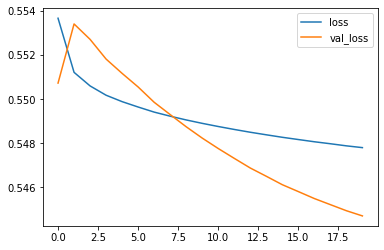

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
pred = model.predict(test_dataset)

2/2 [==============================] - 2s 11ms/step


In [ ]:
y_test.apply(lambda x: False if x==1 else True).sum()

61

In [ ]:
(pred.round() == y_test.to_numpy().reshape(127,1)).sum()

125

In [ ]:
len(pred)

127

In [ ]:
y_test.to_numpy().reshape(127,1)

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
!mkdir -p /content/drive/MyDrive/Algo_model

In [ ]:
model.save('/content/drive/MyDrive/Algo_model/Model_03/03/2023_16_44_data_10_3')

In [ ]:
!cd ./Algo_Trading/

In [ ]:
tata_ds = tata_stock.create_dataset()

NameError: ignored

In [ ]:
tata_ds.head()

,t-20,t-19,t-18,t-17,t-16,t-15,t-14,t-13,t-12,t-11,...,t-3,t-2,t-1,log_returns,t+1,t+2,t+3,t+4,t+5,t+6
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-02,-0.007711,-0.012088,-0.017140,-0.057784,-0.011407,-0.015976,0.050473,0.015236,-0.044900,-0.003007,...,-0.038834,-0.002829,-0.070423,0.041411,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-03,-0.012088,-0.017140,-0.057784,-0.011407,-0.015976,0.050473,0.015236,-0.044900,-0.003007,0.017407,...,-0.002829,-0.070423,0.041411,0.037476,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-04,-0.017140,-0.057784,-0.011407,-0.015976,0.050473,0.015236,-0.044900,-0.003007,0.017407,-0.005685,...,-0.070423,0.041411,0.037476,-0.005157,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-07,-0.057784,-0.011407,-0.015976,0.050473,0.015236,-0.044900,-0.003007,0.017407,-0.005685,0.001634,...,0.041411,0.037476,-0.005157,-0.003918,0.0,0.0,0.0,0.0,0.0,1.0
2011-02-08,-0.011407,-0.015976,0.050473,0.015236,-0.044900,-0.003007,0.017407,-0.005685,0.001634,-0.006129,...,0.037476,-0.005157,-0.003918,-0.030198,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
feature_ls = [f't{i}' for i in range(-20,0)] + ['log_returns']
target_ls = [f't+{i}' for i in range(1,7)]

x_ds = tata_ds[feature_ls]
y_ds = tata_ds[target_ls]



split_len = int(0.8*len(x_ds))

train_x,test_x = x_ds.iloc[:split_len],x_ds.iloc[split_len:]
# train_y,test_y = y_ds.iloc[:split_len],y_ds.iloc[split_len:]

# x_train = tf.data.Dataset.from_tensor_slices(train_x)
# x_test = tf.data.Dataset.from_tensor_slices(test_x)
# y_train = tf.data.Dataset.from_tensor_slices(train_y)
# y_test = tf.data.Dataset.from_tensor_slices(test_y)

# train_data = tf.data.Dataset.zip((x_train,y_train))
# test_data = tf.data.Dataset.zip((x_test,y_test))

# train_data = train_data.batch(32).prefetch(tf.data.AUTOTUNE)
# test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
y_ds.head()

,t+1,t+2,t+3,t+4,t+5,t+6
Date,,,,,,
2011-02-02,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-03,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-04,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-07,0.0,0.0,0.0,0.0,0.0,1.0
2011-02-08,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
psuedo_y_ds = y_ds.replace(to_replace=[0,-1],value=[-1,0])

In [ ]:
split_len = int(0.8*len(x_ds))

In [ ]:
one_hot_y = tf.one_hot(psuedo_y_ds.to_numpy().astype(np.int32),depth=2)
train_y,test_y = one_hot_y[:split_len],one_hot_y[split_len:]

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_ds)

In [ ]:
x_train = tf.data.Dataset.from_tensor_slices(train_x)
x_test = tf.data.Dataset.from_tensor_slices(test_x)
y_train = tf.data.Dataset.from_tensor_slices(train_y)
y_test = tf.data.Dataset.from_tensor_slices(test_y)

train_data = tf.data.Dataset.zip((x_train,y_train))
test_data = tf.data.Dataset.zip((x_test,y_test))

train_data = train_data.batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
for i in train_data:
  print(i[1])
  # print(normalizer(i[0]))
  break

tf.Tensor(
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 1.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 0.]
  [0. 0.]
  [0. 1.]
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 0.]
  [0. 1.]
  [0. 1.]
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 0.]
  [0. 1.]
  [0. 1.]
  [0. 1.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [1. 0.]
  [1. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[0. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[0. 0.]
  [0. 0.]
  [1. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[1. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]

In [ ]:
inputs = tf.keras.layers.Input(shape=(21))
x = normalizer(inputs)
x = tf.keras.layers.Reshape((1,21),input_shape=(21,))(x)
x = tf.keras.layers.LSTM(64,return_sequences=True)(x)
x = tf.keras.layers.LSTM(32,return_sequences=True)(x)
x = tf.keras.layers.LSTM(16,return_sequences=True)(x)
x = tf.keras.layers.Dense(7,activation='relu')(x)
x_h = [tf.keras.layers.Dense(2,activation='sigmoid',name=f'final_{i}')(x) for i in range(1,7)]
outputs = tf.keras.layers.Concatenate(axis=1)(x_h)
model_1 = tf.keras.Model(inputs=inputs,outputs=outputs)

TensorShape([None, 6, 2])

In [ ]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
model_1.fit(train_data,
            epochs=10,
            validation_data=test_data)

Epoch 1/10
75/75 [==============================] - 12s 30ms/step - loss: 0.1106 - accuracy: 0.2797 - val_loss: 0.1551 - val_accuracy: 0.3763
Epoch 2/10
75/75 [==============================] - 1s 13ms/step - loss: 0.1106 - accuracy: 0.3659 - val_loss: 0.1551 - val_accuracy: 0.4420
Epoch 3/10
75/75 [==============================] - 1s 13ms/step - loss: 0.1106 - accuracy: 0.4156 - val_loss: 0.1552 - val_accuracy: 0.4780
Epoch 4/10
75/75 [==============================] - 1s 13ms/step - loss: 0.1105 - accuracy: 0.4354 - val_loss: 0.1551 - val_accuracy: 0.4841
Epoch 5/10
75/75 [==============================] - 1s 10ms/step - loss: 0.1104 - accuracy: 0.4371 - val_loss: 0.1550 - val_accuracy: 0.4880
Epoch 6/10
75/75 [==============================] - 1s 8ms/step - loss: 0.1100 - accuracy: 0.4253 - val_loss: 0.1543 - val_accuracy: 0.4802
Epoch 7/10
75/75 [==============================] - 1s 8ms/step - loss: 0.1089 - accuracy: 0.4058 - val_loss: 0.1533 - val_accuracy: 0.4702
Epoch 8/10
75/

In [ ]:
y_t = tf.one_hot(tf.random.uniform(shape=(32,7),dtype=tf.int32,minval=-1,maxval=1),depth=2)
y_p = tf.one_hot(tf.random.uniform(shape=(32,7),dtype=tf.int32,minval=-1,maxval=1),depth=2)
# print(y_t,y_p)
cce = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.SUM)
print(cce(y_t,y_p).numpy())

nan


In [ ]:
for i in train_data:
  idx = np.array([-1,0,1])
  # print(i[1].numpy())
  print(tf.one_hot(idx[tf.cast(i[1],dtype=tf.int32).numpy()],depth=2))
  break

tf.Tensor(
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [1. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[0. 0.]
  [0. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[0. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[0. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 1.]
  [0. 1.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 0.]
  [0. 1.]
  [0. 1.]
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 0.]
  [0. 0.]
  [0. 1.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 1.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]

In [ ]:
print(y_p)

tf.Tensor(
[[[0. 0.]
  [0. 0.]
  [1. 0.]
  [1. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]], shape=(1, 7, 2), dtype=float32)


In [ ]:
history_1 = model_1.fit()

TensorShape([None, 1, 41])

In [ ]:
indices = tf.constant([[0,1,-1,1,0,-1],
                    [0,0,1,-1,1,0]])
idx = tf.constant([-1,0,1])
idx[indices]

InvalidArgumentError: ignored

In [ ]:
np.floor((indices-1)/2)

array([-1.,  0., -1.])

# Current Working

In [ ]:
!python3 -m pip install eodhd -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.3/111.3 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 5.8 MB/s eta 0:00:00
  Created wheel for eodhd: filename=eodhd-1.0.9-py3-none-any.whl size=9069 sha256=ce4cc9289deb5288a5df41b5a1fc6f9b26af49c7b4b5c88a6e087b63a91c9421
  Stored in directory: /root/.cache/pip/wheels/d6/17/a3/216fe45f799f80d4c76da4f02866dc7a0a984f2cb240d491c9
Successfully built eodhd
  Attempting unin

In [ ]:
from eodhd import APIClient
api = APIClient("641ee0ca4a5447.61245162")

In [ ]:
df_exchanges = api.get_exchanges()

In [ ]:
df_exchanges.head()

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
0,USA Stocks,US,"XNAS, XNYS",USA,USD,US,USA
1,London Exchange,LSE,XLON,UK,GBP,GB,GBR
2,TSX Venture Exchange,V,XTSX,Canada,CAD,CA,CAN
3,NEO Exchange,NEO,NEOE,Canada,CAD,CA,CAN
4,Toronto Exchange,TO,XTSE,Canada,CAD,CA,CAN


In [ ]:
df_exchanges[df_exchanges['Country']=='India']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py", line 3629, in get_loc
    this = self.unique()
KeyError: 'country'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
KeyError: 'country'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    retu

In [ ]:
df_exchanges[df_exchanges['Country']=='India']

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
38,Bombay Exchange,BSE,XBOM,India,INR,IN,IND
46,NSE (India),NSE,XNSE,India,INR,IN,IND


In [ ]:
df_symbols = api.get_exchange_symbols('NSE')

In [ ]:
df_symbols[df_symbols['Code']=='TATAMOTORS']

,Code,Name,Country,Exchange,Currency,Type,Isin
1878,TATAMOTORS,Tata Motors Limited,India,NSE,INR,Common Stock,INE155A01022


In [ ]:
df_1m = api.get_historical_data('TATAMOTORS.NSE','15m')

[12:10:25] '15m' is not a valid Interval                                                           ]8;id=274660;file:///usr/local/lib/python3.9/dist-packages/eodhd/apiclient.py\apiclient.py]8;;\:]8;id=553045;file:///usr/local/lib/python3.9/dist-packages/eodhd/apiclient.py#177\177]8;;\

In [ ]:
df_1m

,symbol,interval,open,high,low,close,adjusted_close,volume
date,,,,,,,,
2022-05-30,TATAMOTORS.NSE,1d,437.00,445.20,436.00,442.40,442.40,18500266
2022-05-31,TATAMOTORS.NSE,1d,443.95,449.50,440.40,443.55,443.55,22308219
2022-06-01,TATAMOTORS.NSE,1d,445.10,446.00,439.60,444.60,444.60,11930669
2022-06-02,TATAMOTORS.NSE,1d,445.00,445.60,435.65,439.15,439.15,12742438
2022-06-03,TATAMOTORS.NSE,1d,444.90,445.05,430.50,431.90,431.90,12780122
...,...,...,...,...,...,...,...,...
2023-03-20,TATAMOTORS.NSE,1d,415.60,416.95,405.50,410.75,410.75,10075022
2023-03-21,TATAMOTORS.NSE,1d,412.85,413.90,407.70,412.55,412.55,7391950
2023-03-22,TATAMOTORS.NSE,1d,416.00,418.40,413.75,416.10,416.10,5728054


In [ ]:
!git clone https://github.com/meet-seth/Algo_Trading.git
!python3 -m pip install yfinance

Cloning into 'Algo_Trading'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 52 (delta 26), reused 45 (delta 19), pack-reused 0
Unpacking objects: 100% (52/52), 472.08 KiB | 3.60 MiB/s, done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.chdir('./Algo_Trading')

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from dataset import Stock_Dataset_2 as std2

In [ ]:
tata_stock = std2(ticker='TATAMOTORS.NS',start='2011-01-01',
                  end=pd.Timestamp.today(),interval='1D')
tata_ds = tata_stock.create_dataset(qty=5,window=20,horizon=7)

[*********************100%***********************]  1 of 1 completed


/content/Algo_Trading/dataset.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[key_ls].dropna(inplace=True)


In [ ]:
data = tata_stock.data

Date
2011-01-03    0.0
2011-01-04    0.0
2011-01-05   -1.0
2011-01-06    0.0
2011-01-07    0.0
             ... 
2023-03-09    0.0
2023-03-10    0.0
2023-03-13    0.0
2023-03-14    0.0
2023-03-15    0.0
Name: t+2, Length: 3010, dtype: float64

In [ ]:
price_data = data.price.copy()

In [ ]:
qty = 1
new_df = pd.DataFrame(price_data)
new_df['price_t-1'] = new_df.price.shift(1)
new_df['turnover'] = qty*new_df['price']+new_df['price_t-1']
new_df['stt'] = round(0.1*new_df['turnover']/100,2)
new_df['txn_nse'] = round(0.00345*new_df['turnover']/100,2)
new_df['gst'] = round(18/100*new_df['txn_nse'],2)
new_df['stamp'] = round(0.015/100*new_df['price_t-1']*qty)
new_df['cost'] = new_df['stt']+new_df['txn_nse']+new_df['gst']+new_df['stamp']+15.94
s_pnl = new_df['price']-new_df['price_t-1']
new_df['sigmoid'] = (np.sign(s_pnl)*(s_pnl.abs()-new_df['cost']).apply(lambda x: 1 if x>0 else 0)).abs()
new_df['tanh'] = np.sign(new_df['price'] - new_df['price_t-1'])
new_df['log_returns'] = np.log(new_df['price']/new_df['price_t-1'])
for i in range(1,7):
  new_df[f'r-{i}'] = new_df['log_returns'] .shift(i)
feature_ls = ['log_returns']+[f'r-{i}' for i in range(1,7)]
new_df = new_df.dropna()
new_df = new_df[feature_ls+['tanh','sigmoid']]

In [ ]:
new_df['sigmoid'].value_counts()

0.0    2876
1.0     134
Name: sigmoid, dtype: int64

In [ ]:
X = new_df[feature_ls]
y = new_df[['tanh','sigmoid']]
split_len = int(0.8*len(X))
x_train,x_test,y_train, y_test = X[:split_len],X[split_len:],y[:split_len],y[split_len:]
train_x = tf.data.Dataset.from_tensor_slices(x_train)
test_x = tf.data.Dataset.from_tensor_slices(x_test)
train_y = tf.data.Dataset.from_tensor_slices(y_train)
test_y = tf.data.Dataset.from_tensor_slices(y_test)

train_data = tf.data.Dataset.zip((train_x,train_y)).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = tf.data.Dataset.zip((test_x,test_y)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
y['tanh'] = y['tanh'].replace(to_replace=[-1],value=[0])

<ipython-input-106-22182bbe6aef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['tanh'] = y['tanh'].replace(to_replace=[-1],value=[0])


In [ ]:
y_train_t, y_test_t = y['tanh'][:split_len], y['tanh'][split_len:]
y_train_s, y_test_s = y['sigmoid'][:split_len], y['sigmoid'][split_len:]

train_y_t, test_y_t = tf.data.Dataset.from_tensor_slices(y_train_t), tf.data.Dataset.from_tensor_slices(y_test_t)
train_y_s, test_y_s = tf.data.Dataset.from_tensor_slices(y_train_s), tf.data.Dataset.from_tensor_slices(y_test_s)

train_t = tf.data.Dataset.zip((train_x,train_y_t)).batch(32).prefetch(tf.data.AUTOTUNE)
test_t = tf.data.Dataset.zip((test_x,test_y_t)).batch(32).prefetch(tf.data.AUTOTUNE)

train_s = tf.data.Dataset.zip((train_x,train_y_s)).batch(32).prefetch(tf.data.AUTOTUNE)
test_s = tf.data.Dataset.zip((test_x,test_y_s)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
norm_1 = tf.keras.layers.Normalization()
norm_1.adapt(new_df[feature_ls])

In [ ]:
inp_1 = tf.keras.layers.Input(shape=(7,))
x = norm_1(inp_1)
x = tf.keras.layers.Reshape((1,7),input_shape=(7,))(x)
x = tf.keras.layers.LSTM(64,return_sequences=True)(x)
x = tf.keras.layers.LSTM(32,return_sequences=True)(x)
x = tf.keras.layers.LSTM(16,return_sequences=True)(x)
out_1 = tf.keras.layers.LSTM(8,return_sequences=True)(x)
body_1 = tf.keras.Model(inputs=inp_1,outputs=out_1)

In [ ]:
tan_body = tf.keras.models.clone_model(body_1)

inp_t = tf.keras.layers.Input(shape=(7,))
x = tan_body(inp_t)
x = tf.keras.layers.Dense(4,activation='relu')(x)
out_t = tf.keras.layers.Dense(1,activation='sigmoid')(x)
out_t = tf.keras.layers.Reshape((1,),input_shape=(1,1))(out_t)
tan_model = tf.keras.Model(inputs=inp_t,outputs=out_t)

In [ ]:
# sig_body = tf.keras.models.clone_model(body_1)

inp_s = tf.keras.layers.Input(shape=(7,))
x = sig_body(inp_s)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
out_s = tf.keras.layers.Dense(1,activation='sigmoid')(x)
out_s = tf.keras.layers.Reshape((1,),input_shape=(1,1))(out_s)
sig_model = tf.keras.Model(inputs=inp_s,outputs=out_s)

In [ ]:
tan_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
history_t = tan_model.fit(train_t,
              epochs=500,
              validation_data=test_t,
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True),
                         tf.keras.callbacks.ReduceLROnPlateau(patience=10,min_lr=0.0001)])

Epoch 1/500
76/76 [==============================] - 14s 41ms/step - loss: 0.6931 - accuracy: 0.5062 - val_loss: 0.6937 - val_accuracy: 0.4601 - lr: 0.0010
Epoch 2/500
76/76 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5141 - val_loss: 0.6950 - val_accuracy: 0.4601 - lr: 0.0010
Epoch 3/500
76/76 [==============================] - 1s 11ms/step - loss: 0.6837 - accuracy: 0.5141 - val_loss: 0.6722 - val_accuracy: 0.4601 - lr: 0.0010
Epoch 4/500
76/76 [==============================] - 1s 11ms/step - loss: 0.5233 - accuracy: 0.7342 - val_loss: 0.4164 - val_accuracy: 0.9485 - lr: 0.0010
Epoch 5/500
76/76 [==============================] - 1s 10ms/step - loss: 0.3146 - accuracy: 0.9593 - val_loss: 0.2585 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 6/500
76/76 [==============================] - 1s 11ms/step - loss: 0.1846 - accuracy: 0.9755 - val_loss: 0.1319 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 7/500
76/76 [==============================] - 1s 11ms/step - l

In [ ]:
sig_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer='adam',
                  metrics='accuracy')

In [ ]:
callback_lst = [tf.keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True),
                tf.keras.callbacks.ReduceLROnPlateau(patience=10,min_lr=0.0001)]
history_s = sig_model.fit(train_s,
                          epochs=500,
                          validation_data=test_s,
                          callbacks=callback_lst)

Epoch 1/500
76/76 [==============================] - 15s 36ms/step - loss: 0.6469 - accuracy: 0.9306 - val_loss: 0.6026 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 2/500
76/76 [==============================] - 1s 11ms/step - loss: 0.5417 - accuracy: 0.9618 - val_loss: 0.5020 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 3/500
76/76 [==============================] - 1s 11ms/step - loss: 0.4345 - accuracy: 0.9618 - val_loss: 0.4109 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 4/500
76/76 [==============================] - 1s 11ms/step - loss: 0.3465 - accuracy: 0.9618 - val_loss: 0.3429 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 5/500
76/76 [==============================] - 1s 11ms/step - loss: 0.2840 - accuracy: 0.9618 - val_loss: 0.2992 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 6/500
76/76 [==============================] - 1s 16ms/step - loss: 0.2388 - accuracy: 0.9618 - val_loss: 0.2737 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 7/500
76/76 [==============================] - 1s 16ms/step - l

In [ ]:
test['sigmoid'].value_counts()

0.0    2932
1.0      77
Name: sigmoid, dtype: int64

In [ ]:
(pnl*test['tanh']).value_counts()

0.0    2875
1.0     134
dtype: int64

In [ ]:
def plot_hist(hist):
  h_df = pd.DataFrame(hist)
  fig = plt.figure(figsize=(10,5))
  axs = fig.subplots(1,2,gridspec_kw={'wspace':0.5,'width_ratios':[2,2]})
  axs[0].plot(h_df['loss'],label='train_loss',color='b')
  axs[0].plot(h_df['val_loss'],label='val_loss',color='r')
  axs[0].set(xlabel='epochs',ylabel='loss')
  axs[0].legend()
  axs[1].plot(h_df['accuracy'],label='train_acc',color='b')
  axs[1].plot(h_df['val_accuracy'],label='val_acc',color='r')
  axs[1].set(xlabel='epochs',ylabel='accuracy')
  plt.legend()
  plt.show()

In [ ]:
# Features Data
feature_ls = [f't{i}' for i in range(-19,0)] + ['log_returns']

x_ds = tata_ds[feature_ls]
y_ds = tata_ds['final_targets'].replace(to_replace=[-1,0,1],value=[1,-1,0]).to_numpy().astype(np.int32)
y_ds = tf.one_hot(y_ds,depth=2)

split_len = int(0.8*len(x_ds))

train_x,test_x = x_ds.iloc[:split_len],x_ds.iloc[split_len:]
train_y, test_y = y_ds[:split_len],y_ds[split_len:]

x_train = tf.data.Dataset.from_tensor_slices(train_x)
x_test = tf.data.Dataset.from_tensor_slices(test_x)
y_train = tf.data.Dataset.from_tensor_slices(train_y)
y_test = tf.data.Dataset.from_tensor_slices(test_y)

train_data = tf.data.Dataset.zip((x_train,y_train))
test_data = tf.data.Dataset.zip((x_test,y_test))

train_data = train_data.batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_ds)

In [ ]:
inputs_1 = tf.keras.layers.Input(shape=(20,))
# x = normalizer(inputs_1)
x = tf.keras.layers.Reshape((1,20),input_shape=(20,))(inputs_1)
x = tf.keras.layers.LSTM(20,return_sequences=True)(x)
x = tf.keras.layers.LSTM(32,return_sequences=True)(x)
x = tf.keras.layers.LSTM(16,return_sequences=True)(x)
x = tf.keras.layers.LSTM(8,return_sequences=True)(x)
x = tf.keras.layers.LSTM(4,return_sequences=True)(x)
outputs_1 = tf.keras.layers.LSTM(2,return_sequences=False,activation='softmax')(x)
model_1 = tf.keras.Model(inputs=inputs_1,outputs=outputs_1)

In [ ]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history_1=model_1.fit(train_data,
            epochs=50,
            validation_data=test_data)

Epoch 1/50
75/75 [==============================] - 16s 43ms/step - loss: 0.3245 - accuracy: 0.6169 - val_loss: 0.4092 - val_accuracy: 0.2709
Epoch 2/50
75/75 [==============================] - 1s 16ms/step - loss: 0.3245 - accuracy: 0.3798 - val_loss: 0.4094 - val_accuracy: 0.2709
Epoch 3/50
75/75 [==============================] - 1s 19ms/step - loss: 0.3244 - accuracy: 0.2401 - val_loss: 0.4095 - val_accuracy: 0.2709
Epoch 4/50
75/75 [==============================] - 1s 14ms/step - loss: 0.3244 - accuracy: 0.2401 - val_loss: 0.4097 - val_accuracy: 0.2709
Epoch 5/50
75/75 [==============================] - 1s 14ms/step - loss: 0.3244 - accuracy: 0.2401 - val_loss: 0.4098 - val_accuracy: 0.2709
Epoch 6/50
75/75 [==============================] - 1s 15ms/step - loss: 0.3244 - accuracy: 0.2401 - val_loss: 0.4099 - val_accuracy: 0.2709
Epoch 7/50
75/75 [==============================] - 1s 14ms/step - loss: 0.3244 - accuracy: 0.2401 - val_loss: 0.4100 - val_accuracy: 0.2709
Epoch 8/50
7

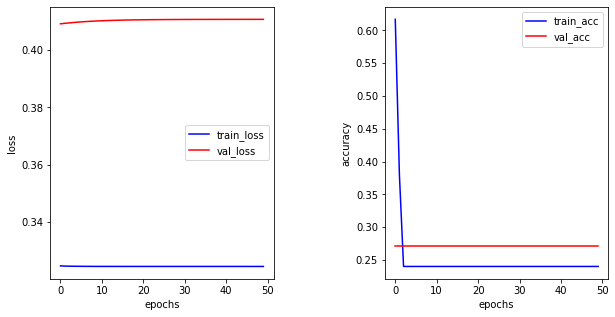

In [ ]:
plot_hist(history_1.history)

In [ ]:
inputs_2 = tf.keras.layers.Input(shape=(20,))
x = normalizer(inputs_2)
x = tf.keras.layers.Reshape((1,20),input_shape=(20,))(x)
x = tf.keras.layers.LSTM(128,return_sequences=True,dropout=0.2)(x)
x = tf.keras.layers.LSTM(64,return_sequences=True,dropout=0.2)(x)
x = tf.keras.layers.LSTM(32,return_sequences=True,dropout=0.2)(x)
x = tf.keras.layers.LSTM(8,return_sequences=True,dropout=0.2)(x)
x = tf.keras.layers.Dense(2,activation='softmax')(x)
outputs_2 = tf.keras.layers.Reshape((2,),input_shape=(1,2))(x)
model_2 = tf.keras.Model(inputs=inputs_2,outputs=outputs_2)

In [ ]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_data,
            epochs=50,
            validation_data=test_data)

Epoch 1/50
75/75 [==============================] - 13s 38ms/step - loss: 0.3247 - accuracy: 0.6223 - val_loss: 0.4093 - val_accuracy: 0.2860
Epoch 2/50
75/75 [==============================] - 2s 20ms/step - loss: 0.3244 - accuracy: 0.3823 - val_loss: 0.4095 - val_accuracy: 0.2726
Epoch 3/50
75/75 [==============================] - 1s 18ms/step - loss: 0.3243 - accuracy: 0.3513 - val_loss: 0.4094 - val_accuracy: 0.3144
Epoch 4/50
75/75 [==============================] - 1s 13ms/step - loss: 0.3239 - accuracy: 0.4262 - val_loss: 0.4087 - val_accuracy: 0.3913
Epoch 5/50
75/75 [==============================] - 1s 13ms/step - loss: 0.3228 - accuracy: 0.4672 - val_loss: 0.4071 - val_accuracy: 0.4615
Epoch 6/50
75/75 [==============================] - 1s 13ms/step - loss: 0.3220 - accuracy: 0.4818 - val_loss: 0.4068 - val_accuracy: 0.4666
Epoch 7/50
75/75 [==============================] - 1s 14ms/step - loss: 0.3188 - accuracy: 0.4893 - val_loss: 0.4073 - val_accuracy: 0.4398
Epoch 8/50
7

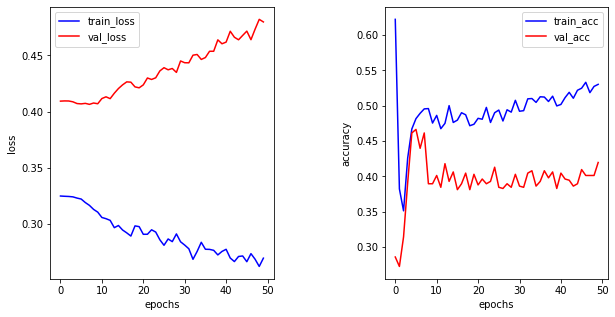

In [ ]:
plot_hist(history_2.history)

In [ ]:
import pandas as pd
stock_data = pd.read_excel('/content/drive/MyDrive/STOCK_DATA.xlsx',header=[0,1],index_col=[0],parse_dates=True)

In [ ]:
stock_data.head()

INFY.NS                                         \
Datetime                     Adj Close        Close         High          Low   
2023-03-16 09:15:00+05:30  1411.099976  1411.099976  1416.750000  1411.000000   
2023-03-16 09:16:00+05:30  1408.150024  1408.150024  1410.900024  1408.000000   
2023-03-16 09:17:00+05:30  1402.500000  1402.500000  1407.800049  1400.849976   
2023-03-16 09:18:00+05:30  1403.000000  1403.000000  1403.199951  1399.150024   
2023-03-16 09:19:00+05:30  1400.800049  1400.800049  1403.000000  1399.050049   

                                                RELIANCE.NS               \
Datetime                          Open  Volume    Adj Close        Close   
2023-03-16 09:15:00+05:30  1416.750000       0  2228.949951  2228.949951   
2023-03-16 09:16:00+05:30  1410.800049   59611  2235.000000  2235.000000   
2023-03-16 09:17:00+05:30  1407.699951  106612  2227.399902  2227.399902   
2023-03-16 09:18:00+05:30  1402.050049  104405  2224.550049  2224.550049   
2023-03-16 09:19:00+05:30  1403.000000   74492  2222.750000  2222.750000   

                                                                          \
Datetime                          High          Low         Open  Volume   
2023-03-16 09:15:00+05:30  2243.949951  2227.800049  2243.000000       0   
2023-03-16 09:16:00+05:30  2235.350098  2229.000000  2229.850098   53241   
2023-03-16 09:17:00+05:30  2234.149902  2227.399902  2233.600098   57327   
2023-03-16 09:18:00+05:30  2227.500000  2221.149902  2227.399902   75079   
2023-03-16 09:19:00+05:30  2225.899902  2222.449951  2224.850098  100588   

                          TATAMOTORS.NS                                      \
Datetime                      Adj Close       Close        High         Low   
2023-03-16 09:15:00+05:30    411.799988  411.799988  413.200012  409.850006   
2023-03-16 09:16:00+05:30    411.850006  411.850006  412.500000  411.250000   
2023-03-16 09:17:00+05:30    411.299988  411.299988  411.750000  410.600006   
2023-03-16 09:18:00+05:30    412.649994  412.649994  412.750000  410.500000   
2023-03-16 09:19:00+05:30    412.200012  412.200012  413.399994  411.850006   

                                               
Datetime                         Open  Volume  
2023-03-16 09:15:00+05:30  413.049988       0  
2023-03-16 09:16:00+05:30  411.649994  107956  
2023-03-16 09:17:00+05:30  411.750000   63792  
2023-03-16 09:18:00+05:30  411.299988  115611  
2023-03-16 09:19:00+05:30  412.899994   66974

In [ ]:
stock_data.index = pd.to_datetime(pd.Series(stock_data.index).apply(lambda x: x.replace(tzinfo=None)))

In [ ]:
infy_data = stock_data['INFY.NS'][['Close','Volume']]
reliance_data = stock_data['RELIANCE.NS'][['Close','Volume']]
tata_data = stock_data['TATAMOTORS.NS'][['Close','Volume']]

In [ ]:
infy_data.index

DatetimeIndex(['2023-03-16 09:15:00', '2023-03-16 09:16:00',
               '2023-03-16 09:17:00', '2023-03-16 09:18:00',
               '2023-03-16 09:19:00', '2023-03-16 09:20:00',
               '2023-03-16 09:21:00', '2023-03-16 09:22:00',
               '2023-03-16 09:23:00', '2023-03-16 09:24:00',
               ...
               '2023-04-06 15:20:00', '2023-04-06 15:21:00',
               '2023-04-06 15:22:00', '2023-04-06 15:23:00',
               '2023-04-06 15:24:00', '2023-04-06 15:25:00',
               '2023-04-06 15:26:00', '2023-04-06 15:27:00',
               '2023-04-06 15:28:00', '2023-04-06 15:29:00'],
              dtype='datetime64[ns]', length=5238, freq=None)

In [ ]:
t_data = tata_data.copy()
t_data.index = range(0,len(t_data))

<Axes: >

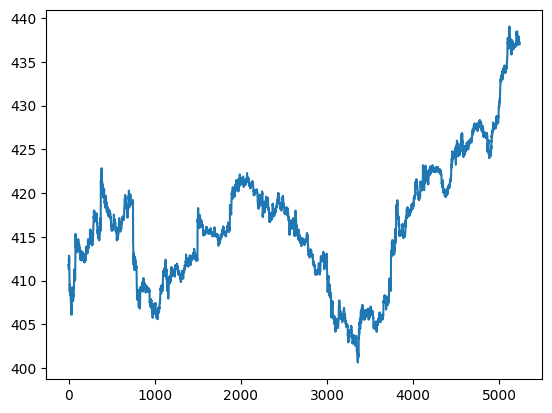

In [ ]:
t_data.Close.plot()

<Axes: >

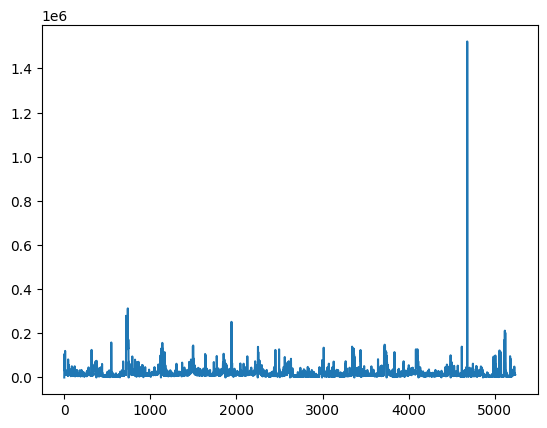

In [ ]:
vl =pd.Series(infy_data.Volume)
vl.index = range(len(vl))
vl.plot()

In [ ]:
import numpy as np
test = np.log(reliance_data.Close).diff(1).dropna()

In [ ]:
len(test)

5234

In [ ]:
test.resample('5T').mean()


2023-03-16 09:15:00   -0.001831
2023-03-16 09:20:00    0.000535
2023-03-16 09:25:00    0.000154
2023-03-16 09:30:00    0.000057
2023-03-16 09:35:00   -0.000085
                         ...   
2023-04-06 15:05:00   -0.000120
2023-04-06 15:10:00   -0.000179
2023-04-06 15:15:00    0.000231
2023-04-06 15:20:00   -0.000038
2023-04-06 15:25:00   -0.000363
Freq: 5T, Name: Close, Length: 6123, dtype: float64

<Axes: >

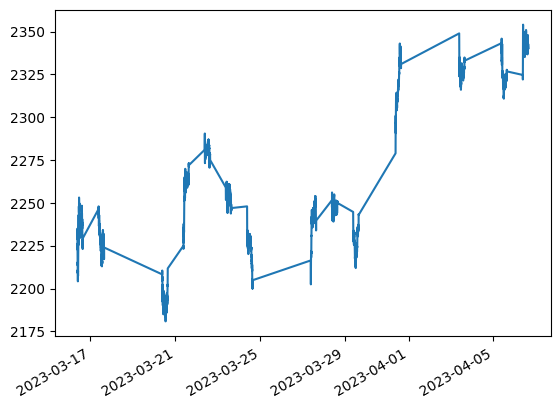

In [ ]:
reliance_data['Close'].plot()

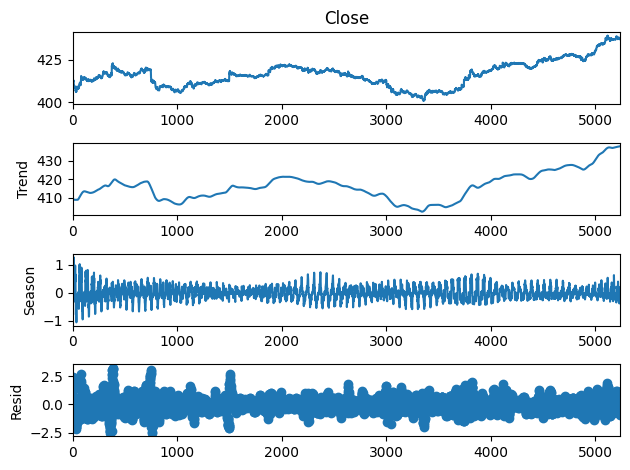

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
res = STL(t_data.Close,period=60,seasonal=15).fit()
res.plot()
plt.show()


In [ ]:
import numpy as np

In [ ]:
infy_data.Close.diff(1).apply(lambda a: np.log(a) if a!=0 else 0)

Datetime
2023-03-16 09:16:00+05:30         NaN
2023-03-16 09:17:00+05:30         NaN
2023-03-16 09:18:00+05:30   -0.693147
2023-03-16 09:19:00+05:30         NaN
2023-03-16 09:20:00+05:30    0.587746
                               ...   
2023-04-06 20:52:00+05:30   -1.386294
2023-04-06 20:53:00+05:30   -2.994756
2023-04-06 20:54:00+05:30   -1.386294
2023-04-06 20:55:00+05:30         NaN
2023-04-06 20:56:00+05:30         NaN
Name: Close, Length: 5222, dtype: float64

In [ ]:
for i in range(1,6):
  infy_data[f'Close+{i}'] = infy_data.Close.shift(-i)

In [ ]:
# transaction costs
pnl = {}
transaction_charges = {}
for i in range(1,6):
  turnover = infy_data[f'Close+{i}'] + infy_data['Close']
  brokerage = 0.03*turnover/100
  stt = 0.025*infy_data[f'Close+{i}']/100
  tc_nse = 0.00325*turnover/100
  gst = 18*(brokerage+tc_nse)/100
  stamp = 0.003*infy_data['Close']/100
  transaction_charges[f'tc_{i}'] = brokerage+stt+tc_nse+gst+stamp
  pnl[f'pnl_{i}'] = infy_data[f'Close+{i}'] - infy_data['Close']

In [ ]:
def my_func(x):
  if abs(x[0])-x[1]<=0:
    return -1 #hold
  else:
    if x[0]>=0:
      return 0#buy
    else:
      return 1#sell

In [ ]:
# pnl['transaction_charges'] = transaction_charges
data = pd.DataFrame(pnl | transaction_charges)
data.head()

,pnl_1,pnl_2,pnl_3,pnl_4,pnl_5,tc_1,tc_2,tc_3,tc_4,tc_5
2023-03-16 09:15:00,-2.949951,-8.599976,-8.099976,-10.299927,-8.500000,1.500503,1.496874,1.497195,1.495782,1.496938
2023-03-16 09:16:00,-5.650024,-5.150024,-7.349976,-5.550049,-2.300049,1.495628,1.495949,1.494536,1.495692,1.497780
2023-03-16 09:17:00,0.500000,-1.699951,0.099976,3.349976,3.699951,1.493563,1.492150,1.493306,1.495394,1.495618
2023-03-16 09:18:00,-2.199951,-0.400024,2.849976,3.199951,1.800049,1.492361,1.493517,1.495605,1.495830,1.494930
2023-03-16 09:19:00,1.799927,5.049927,5.399902,4.000000,3.750000,1.492588,1.494676,1.494900,1.494001,1.493841


In [ ]:
for i in range(1,6):
  data[f's_{i}'] = data[[f'pnl_{i}',f'tc_{i}']].apply(my_func,axis=1)

In [ ]:
print(len(infy_data.Close))
for i in range(1,6):
  print(len(data[f's_{i}']))

5238
5238
5238
5238
5238
5238


In [ ]:
def ex_sig(x):
  for i in x:
    if i!=-1:
      return i
  return -1

In [ ]:
data['f_signal'] = data[[f's_{i}' for i in range(1,6)]].apply(ex_sig,axis=1)

In [ ]:
data['f_signal'].value_counts()

-1    3184
 0    1066
 1     988
Name: f_signal, dtype: int64

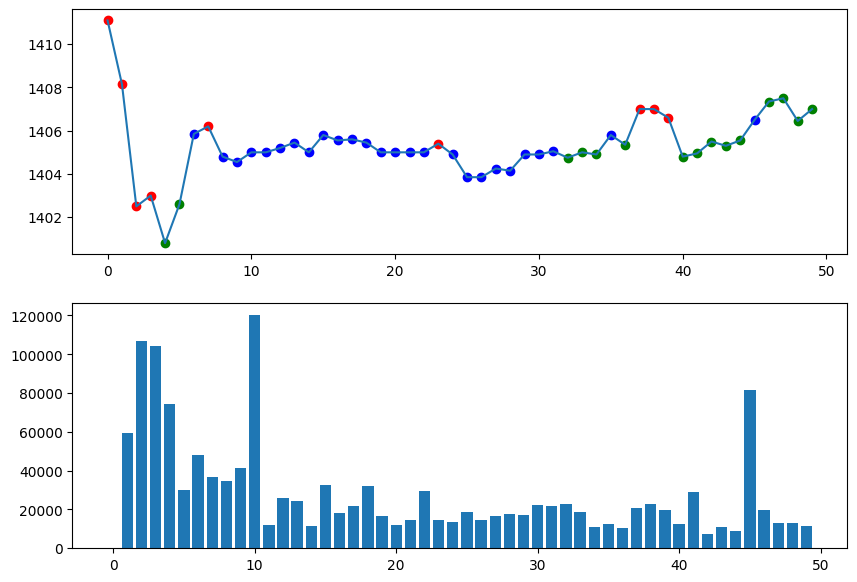

In [ ]:
i=0
x = 50
cls = infy_data.Close[i:i+x]
cls.index = range(x)
sgnl = data['f_signal'][i:i+x]
sgnl.index = range(x)
vl = infy_data.Volume[i:i+x]
vl.index = range(x)
fig = plt.figure(figsize=(10,7))
ax = fig.subplots(2,1)
ax[0].plot(cls)
ax[0].scatter(y=cls[sgnl==-1],x=cls[sgnl==-1].index,color='b')
ax[0].scatter(y=cls[sgnl==0],x=cls[sgnl==0].index,color='g')
ax[0].scatter(y=cls[sgnl==1],x=cls[sgnl==1].index,color='r')
ax[1].bar(range(x),vl)
plt.show()